# CHILDES Corpus

- NLTK can deal with the xml format of the CHILDES corpus
- CHILDES xml is available at [https://childes.talkbank.org/data-xml/](https://childes.talkbank.org/data-xml/)


In [1]:
import nltk
from nltk.corpus.reader import CHILDESCorpusReader
r = CHILDESCorpusReader('../../../Corpus/CHILDES/Chinese/Chang1_xml/', '.*.xml')

In [5]:
r.fileids()

['01.xml',
 '02.xml',
 '03.xml',
 '04.xml',
 '05.xml',
 '06.xml',
 '07.xml',
 '08.xml',
 '09.xml',
 '10.xml',
 '11.xml',
 '12.xml',
 '13.xml',
 '14.xml',
 '15.xml',
 '16.xml',
 '17.xml',
 '18.xml',
 '19.xml',
 '20.xml',
 '21.xml',
 '22.xml',
 '23.xml',
 '24.xml']

In [35]:
# print basic profile for each xml
for f in r.fileids()[:5]:
    cur_corpus = r.corpus(f)[0]
    print(cur_corpus['Corpus'],
          cur_corpus['PID'],
         cur_corpus['ActivityType'],
         cur_corpus['Date'])
    print("Num of Words: {}".format(len(r.words(f))))
    print("Num of Sents: {}".format(len(r.sents(f))))

Chang1 11312/c-00007599-1 toyplay 1996-02-06
Num of Words: 1632
Num of Sents: 343
Chang1 11312/c-00007600-1 toyplay 1996-02-06
Num of Words: 864
Num of Sents: 215
Chang1 11312/c-00007601-1 toyplay 1996-02-06
Num of Words: 879
Num of Sents: 197
Chang1 11312/c-00007602-1 toyplay 1996-02-07
Num of Words: 816
Num of Sents: 144
Chang1 11312/c-00007603-1 toyplay 1996-02-07
Num of Words: 1294
Num of Sents: 200


In [43]:
# participants
r.participants(fileids=r.fileids()[10])[0]# first file participants

defaultdict(<function nltk.corpus.reader.childes.CHILDESCorpusReader._get_participants.<locals>.dictOfDicts()>,
            {'CHI': defaultdict(<function nltk.corpus.reader.childes.CHILDESCorpusReader._get_participants.<locals>.dictOfDicts()>,
                         {'id': 'CHI',
                          'name': '中立',
                          'role': 'Target_Child',
                          'language': 'zho',
                          'age': 'P6Y05M',
                          'sex': 'male',
                          'group': 'six',
                          'SES': 'MC',
                          'birthday': '1989-09-22'}),
             'EXP': defaultdict(<function nltk.corpus.reader.childes.CHILDESCorpusReader._get_participants.<locals>.dictOfDicts()>,
                         {'id': 'EXP',
                          'role': 'Investigator',
                          'language': 'zho'})})

In [49]:
all_speakers = r.participants()

for speakers_cur_file in all_speakers[:5]:
    print("====")
    for spid in speakers_cur_file.keys():
        cur_spid_data = speakers_cur_file[spid]
        print(spid, ": ", [(param, cur_spid_data[param]) for param in cur_spid_data.keys()] )

====
CHI :  [('id', 'CHI'), ('name', '爱华'), ('role', 'Target_Child'), ('language', 'zho'), ('age', 'P6Y05M'), ('sex', 'female'), ('group', 'six'), ('SES', 'MC'), ('birthday', '1989-09-25')]
EXP :  [('id', 'EXP'), ('role', 'Investigator'), ('language', 'zho')]
====
CHI :  [('id', 'CHI'), ('name', '建华'), ('role', 'Target_Child'), ('language', 'zho'), ('age', 'P6Y01M'), ('sex', 'male'), ('group', 'six'), ('SES', 'MC'), ('birthday', '1989-01-17')]
EXP :  [('id', 'EXP'), ('role', 'Investigator'), ('language', 'zho')]
====
CHI :  [('id', 'CHI'), ('name', '凯丽'), ('role', 'Target_Child'), ('language', 'zho'), ('age', 'P5Y07M'), ('sex', 'female'), ('group', 'five'), ('SES', 'MC'), ('birthday', '1990-07-10')]
EXP :  [('id', 'EXP'), ('role', 'Investigator'), ('language', 'zho')]
====
CHI :  [('id', 'CHI'), ('name', '志强'), ('role', 'Target_Child'), ('language', 'zho'), ('age', 'P5Y11M'), ('sex', 'male'), ('group', 'five'), ('SES', 'MC'), ('birthday', '1990-03-28')]
EXP :  [('id', 'EXP'), ('role', 

In [56]:
r.words('01.xml')
print(r.sents('01.xml', speaker='EXP'))
print(r.sents('01.xml', speaker='CHI')) # replace=T, stem=True

[['我们', '来', '玩', '森林', '的', '游戏'], ['哦', '这', '是', '森林', '的', '草地'], ...]
[['森林', '有', '很', '多', '树'], ['爸爸', '办公室', '有', '好', '多', '树'], ...]


In [60]:
# age
r.age()
r.age(month=True)
r.age(fileids='01.xml', month=True)

[77]

In [62]:
# MLU
r.MLU(fileids='01.xml')

[5.5606060606060606]

In [71]:
[(age, mlu)  
for f in r.fileids()
for age in r.age(fileids = f, month=True)
for mlu in r.MLU(fileids = f)
]

[('P6Y05M', 5.5606060606060606),
 ('P6Y01M', 4.304347826086956),
 ('P5Y07M', 4.445783132530121),
 ('P5Y11M', 5.046511627906977),
 ('P6Y02M', 7.421052631578948),
 ('P6Y05M', 8.365853658536585),
 ('P5Y11M', 7.355263157894737),
 ('P5Y10M', 9.371428571428572),
 ('P5Y07M', 5.439024390243903),
 ('P5Y09M', 5.931677018633541),
 ('P6Y05M', 5.0),
 ('P5Y10M', 6.712328767123288),
 ('P4Y00M', 4.022222222222222),
 ('P4Y03M', 5.208791208791209),
 ('P4Y04M', 3.9863013698630136),
 ('P4Y03M', 3.8867924528301887),
 ('P4Y02M', 5.409638554216867),
 ('P3Y06M', 3.3185840707964602),
 ('P3Y11M', 6.27027027027027),
 ('P3Y11M', 3.9545454545454546),
 ('P4Y01M', 3.68),
 ('P4Y05M', 4.785714285714286),
 ('P3Y10M', 5.798941798941799),
 ('P3Y10M', 3.5090909090909093)]

In [75]:
import pandas

age_mlu_data = pandas.DataFrame([(age, mlu)  
for f in r.fileids()
for age in r.age(fileids = f, month=True)
for mlu in r.MLU(fileids = f)
], columns=['Age','MLU'])

In [78]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(ggplot2)
library(dplyr)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



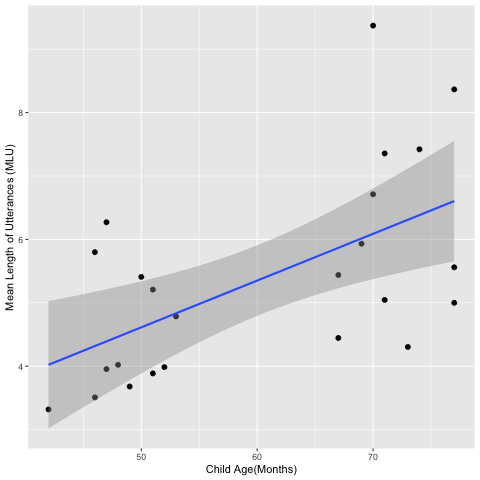

In [84]:
%%R -i age_mlu_data
age_mlu_data %>%
ggplot(aes(Age, MLU)) +
geom_point(size=2) +
geom_smooth(method="lm") +
labs(x="Child Age(Months)",y="Mean Length of Utterances (MLU)")

## CHA file

- Fantastic package for CHA files: [PyLangAcq](http://pylangacq.org/)

In [2]:
import pylangacq as pla
pylangacq.__version__  # show version number

'0.11.0'

In [3]:
nccu = pla.read_chat('../../../Corpus/NCCUTaiwanMandarin/transcript/*.cha')

In [4]:
nccu.number_of_files()

36

In [7]:
print('Corpus Size:', len(nccu.words()))

Corpus Size: 171254


In [41]:
all_headers= nccu.headers()
#all_headers[list(all_headers.keys())[0]]
list(all_headers.items())[0]

('/Users/Alvin/Dropbox/Corpus/NCCUTaiwanMandarin/transcript/M019.cha',
 {'UTF8': '',
  'PID': '11312/a-00005100-1',
  'Languages': 'zho, nan, eng',
  'Participants': {'F': {'participant_name': 'Participant',
    'language': 'zho',
    'corpus': 'TaiwanMandarin',
    'age': '24;',
    'sex': 'female',
    'group': '',
    'SES': 'Asian',
    'participant_role': 'Participant',
    'education': '',
    'custom': 'Friend'},
   'M': {'participant_name': 'Participant',
    'language': 'zho',
    'corpus': 'TaiwanMandarin',
    'age': '24;',
    'sex': 'male',
    'group': '',
    'SES': 'Asian',
    'participant_role': 'Participant',
    'education': '',
    'custom': 'Friend'}},
  'Options': 'CA-Unicode',
  'Media': 'M019, audio, unlinked',
  'Comment': 'Please use the slider at the left to control media playback.',
  'Date': ['07-OCT-2009']})

In [14]:
nccu.word_frequency().most_common(5)
nccu.word_ngrams(n=3).most_common(10)

[(('對', '對', '對'), 210),
 (('然後', '我', '就'), 137),
 (('我', '不', '知道'), 129),
 (('⌊', '對', '啊'), 119),
 (('有', '一', '個'), 113),
 (('對', '啊', '⌋'), 109),
 (('⌊', 'um', '⌋'), 108),
 (('我', '就', '說'), 90),
 (('真', '的', '很'), 76),
 (('他', '就', '說'), 71)]

In [45]:
for line in [' '.join(sent) for sent in nccu.sents()[:10]]:
    print(line)

反正 就 我 覺得 喔 就 現在 小學生 程度 差 真 的 很 誇張 我 教 的 那個 我 教 的 那個 小五 跟 我 上次 上次 教到 的 ⌈ 那個 小五 ⌉
⌊ 對 對 那個 ⌋ 那個
一樣 喔 我 那個 學生 是 他 學 那個 何嘉仁 已經 那個 程度 太 高 了 他 跟不上 才 請 家教 我 上次 去 那個 瑛如 他們 那個 是 那個 課本 太 難 他 完全 看不懂 他 連 you I 都 看不懂 然後 我 那個 學生 是 課本 太 簡單 了 瞄 兩下 單字 背 一下 就好 那 我們 先 把 這 簡單 的 課本 放到 旁邊 去 我們 來 看 何嘉仁 是 這樣子 耶 差 好 多 喔 然後 看了 有 點 心酸 吶 ⌈ 可 那 沒 辦法 ⌉
⌊ 可 那 沒 辦 ⌋ .
沒 辦法
對 呀 因為 這 並 不是 老師 有時候 我 覺得 老師 其實 能 做 的
而且 ⌈ 一 個 禮拜 ⌉ 才 一 次 耶
⌊ 大概 有 ⌋
⌈ 一 次 ⌉
⌊ 一 個 禮拜 ⌋ 一 次 真的 很 少 ⌈ 家教 都 ⌉ /.
